In [59]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

In [60]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [62]:
df.price.describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [63]:
df.shape

(13320, 9)

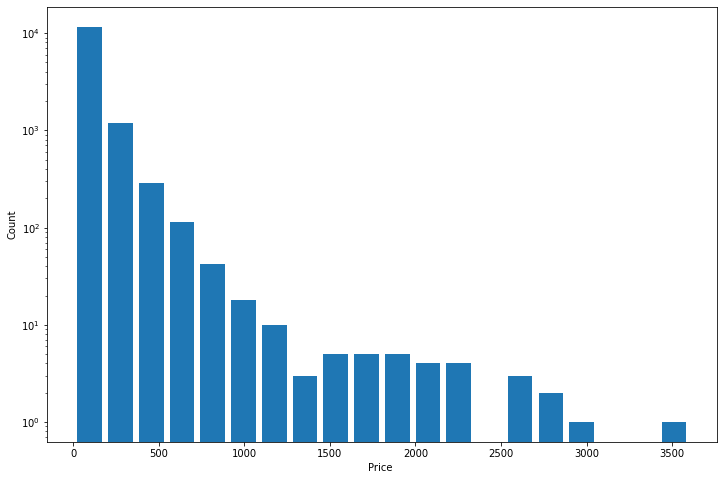

In [64]:
plt.hist(df.price, bins=20, rwidth=0.8)
plt.xlabel('Price ')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [65]:
lower_limit, upper_limit = df.price.quantile([0.001, 0.999])
lower_limit, upper_limit

(11.159500000000001, 2000.0)

In [66]:
outliers = df[(df.price > upper_limit) | (df.price < lower_limit)]
outliers.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
942,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 2hu,400,1.0,1.0,11.00
12443,Plot Area,Ready To Move,Dollars Colony,4 Bedroom,NaN,4350,8.0,NaN,2600.00
605,Super built-up Area,19-Jan,Malleshwaram,7 BHK,NaN,12000,7.0,3.0,2200.00
3180,Super built-up Area,Ready To Move,Shanthala Nagar,5 BHK,Kierser,8321,5.0,3.0,2700.00
4162,Built-up Area,Ready To Move,Yemlur,4 Bedroom,Epllan,7000,5.0,NaN,2050.00
2623,Plot Area,18-Jul,Dodsworth Layout,4 Bedroom,NaN,30000,4.0,NaN,2100.00
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.00
11945,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 2hu,400,1.0,1.0,10.25
8594,Built-up Area,Ready To Move,Chandapura,1 BHK,NaN,450,1.0,1.0,9.00
1471,Built-up Area,18-Mar,Kengeri,1 BHK,NaN,340,1.0,1.0,10.00


In [67]:
df2 = df[(df.price<upper_limit) & (df.price>lower_limit)]
df2.shape

(13291, 9)

In [68]:
df.shape

(13320, 9)

In [69]:
df.shape[0] - df2.shape[0]

29

In [70]:
max_limit = df2.price.mean() + 4*df2.price.std()
min_limit = df2.price.mean() - 4*df2.price.std()
max_limit, min_limit

(611.7477497493892, -391.7270282084969)

In [71]:
df2[(df2.price>max_limit) | (df2.price < min_limit)].sample(10)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1744,Plot Area,Ready To Move,Victoria Layout,5 Bedroom,NaN,2400,5.0,1.0,625.0
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,NaN,2400,40.0,0.0,660.0
641,Plot Area,Ready To Move,"6th block banashankari 3rd stage, 100 feet ORR",3 Bedroom,NaN,4000,3.0,1.0,660.0
1873,Plot Area,Ready To Move,Kasavanhalli,5 Bedroom,NaN,5800,7.0,NaN,1200.0
1405,Super built-up Area,19-Dec,Kodihalli,4 BHK,Priesla,3073,5.0,2.0,696.0
9974,Plot Area,Ready To Move,Sector 1 HSR Layout,3 Bedroom,NaN,2400,6.0,2.0,775.0
9546,Plot Area,Ready To Move,Yemlur,5 Bedroom,Epllan,10000,5.0,NaN,1950.0
10749,Plot Area,Ready To Move,Sarjapur Road,5 Bedroom,AdlasRe,10000,4.0,2.0,975.0
11653,Plot Area,18-Apr,Sathya Sai Layout,4 Bedroom,Prowshi,4304,4.0,2.0,699.0
10570,Plot Area,Ready To Move,Electronic City,4 Bedroom,Aroveth,1800,3.0,2.0,700.0


In [72]:
df3 = df2[(df2.price>min_limit) & (df2.price < max_limit)]
df3.shape

(13144, 9)

In [73]:
df2.shape[0]-df3.shape[0]

147

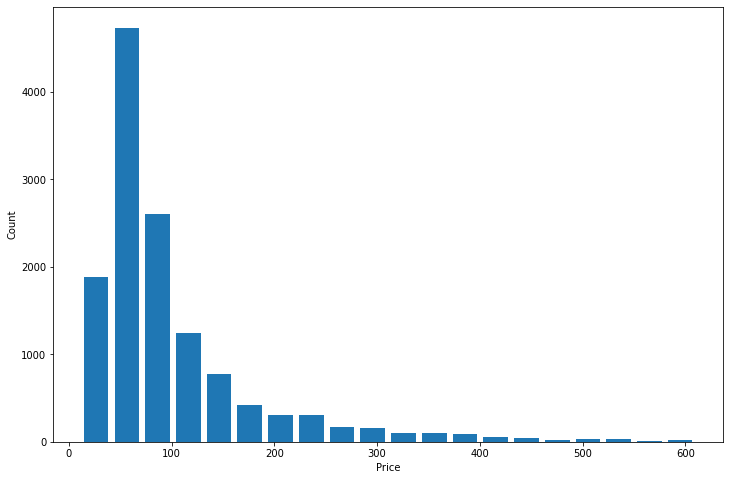

In [74]:
plt.hist(df3.price, bins=20, rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [75]:
from scipy.stats import norm
import numpy as np

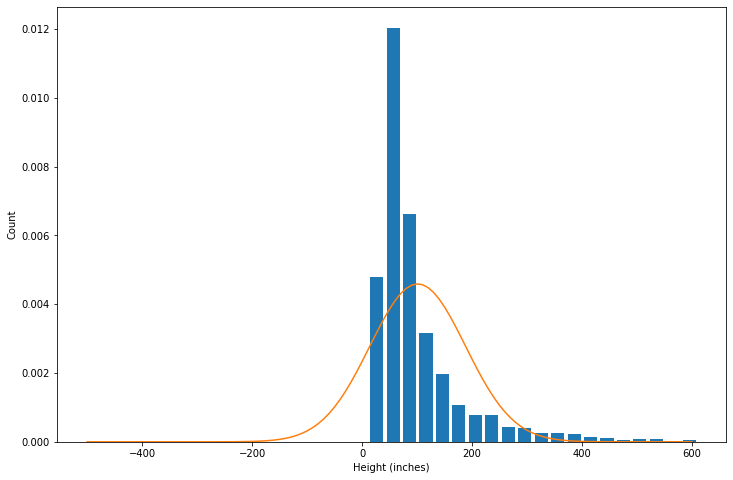

In [91]:
plt.hist(df3.price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-500, df3.price.max(), 10)
plt.plot(rng, norm.pdf(rng,df3.price.mean(),df3.price.std()))